In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
company_list=['AAPL_data.csv','AMZN_data.csv','GOOGL_data.csv','MSFT_data.csv']

In [3]:
apple=pd.read_csv('AAPL_data.csv')
amazon=pd.read_csv('AMZN_data.csv')
google=pd.read_csv('GOOGL_data.csv')
microsoft=pd.read_csv('MSFT_data.csv')
all_data=pd.concat([apple,google,amazon,microsoft])
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

# Analyzing closing price of stocks

In [4]:
tech_list=all_data['Name'].unique()
tech_list

array(['AAPL', 'GOOGL', 'AMZN', 'MSFT'], dtype=object)

In [5]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
all_data['date']=pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

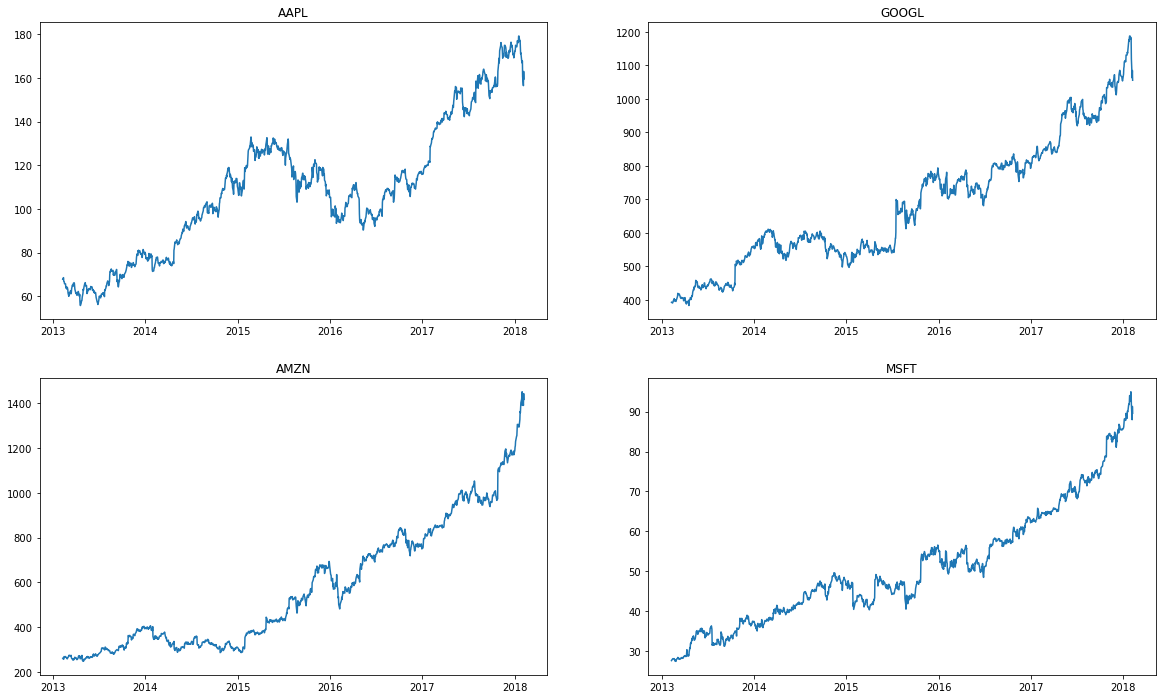

In [7]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

# Analyze the total volume of stock being traded each day.

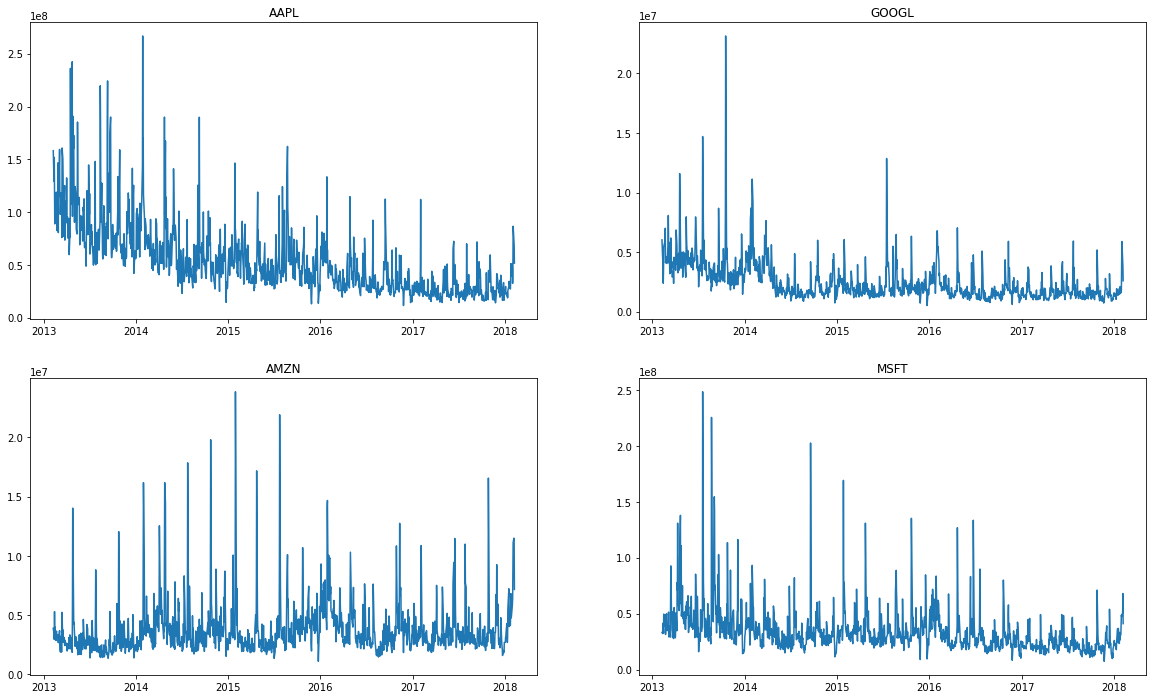

In [8]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

# Analyzing daily price change in the stock

In [9]:
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [10]:
apple['change_in_price']=apple['close']-apple['open']
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   change_in_price  
0           0.1400  
1           0.4900  
2          -1.6586  
3          -0.0286  
4           0.2957

In [11]:
apple['1 day % return']=((apple['close']-apple['open'])/apple['close'])*100
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   change_in_price  1 day % return  
0           0.1400        0.206325  
1           0.4900        0.714688  
2          -1.6586       -2.481344  
3          -0.0286       -0.042869  
4           0.2957        0.443624

In [12]:
fig=px.line(apple,x='date',y='1 day % return')
fig.show()

# Monthly mean of close feature

In [13]:
apple1=apple.copy()

In [14]:
apple.dtypes

date                object
open               float64
high               float64
low                float64
close              float64
volume               int64
Name                object
change_in_price    float64
1 day % return     float64
dtype: object

In [15]:
apple1['date']=pd.to_datetime(apple1['date'])

In [16]:
apple1.set_index(['date'],inplace=True)

In [17]:
apple1.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            change_in_price  1 day % return  
date                                         
2013-02-08           0.1400        0.206325  
2013-02-11           0.4900        0.714688  
2013-02-12          -1.6586       -2.481344  
2013-02-13          -0.0286       -0.042869  
2013-02-14           0.2957        0.443624

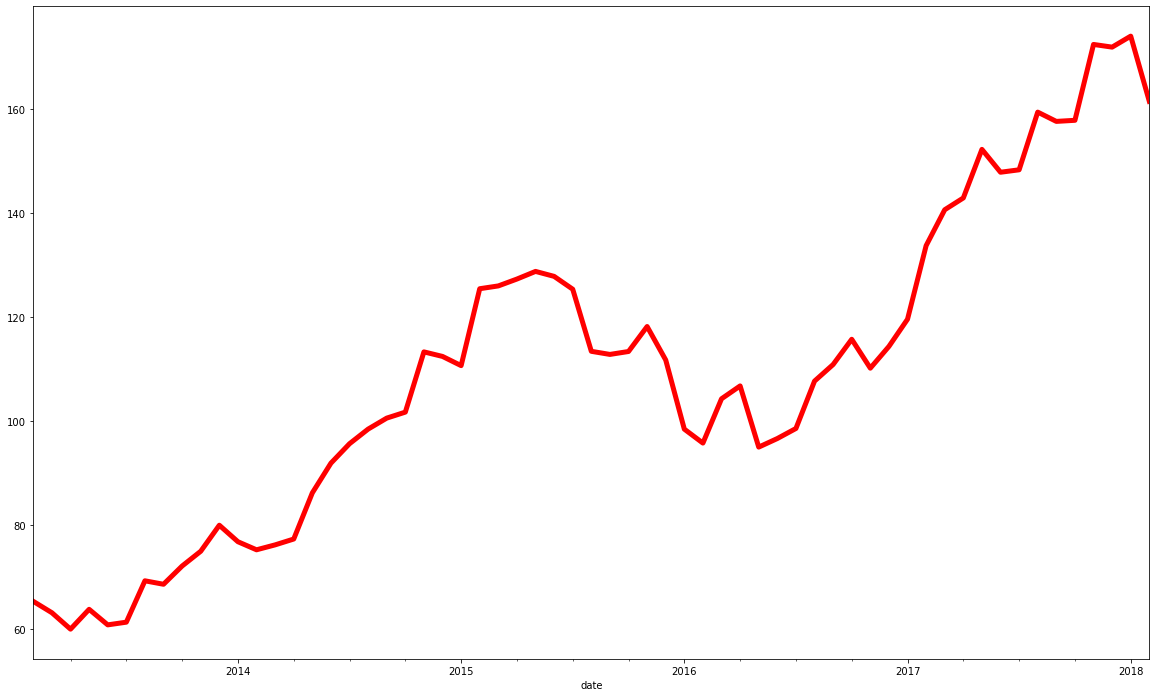

In [18]:
plt.figure(figsize=(20,12))
apple1['close'].resample('M').mean().plot(color='red',lw=5);

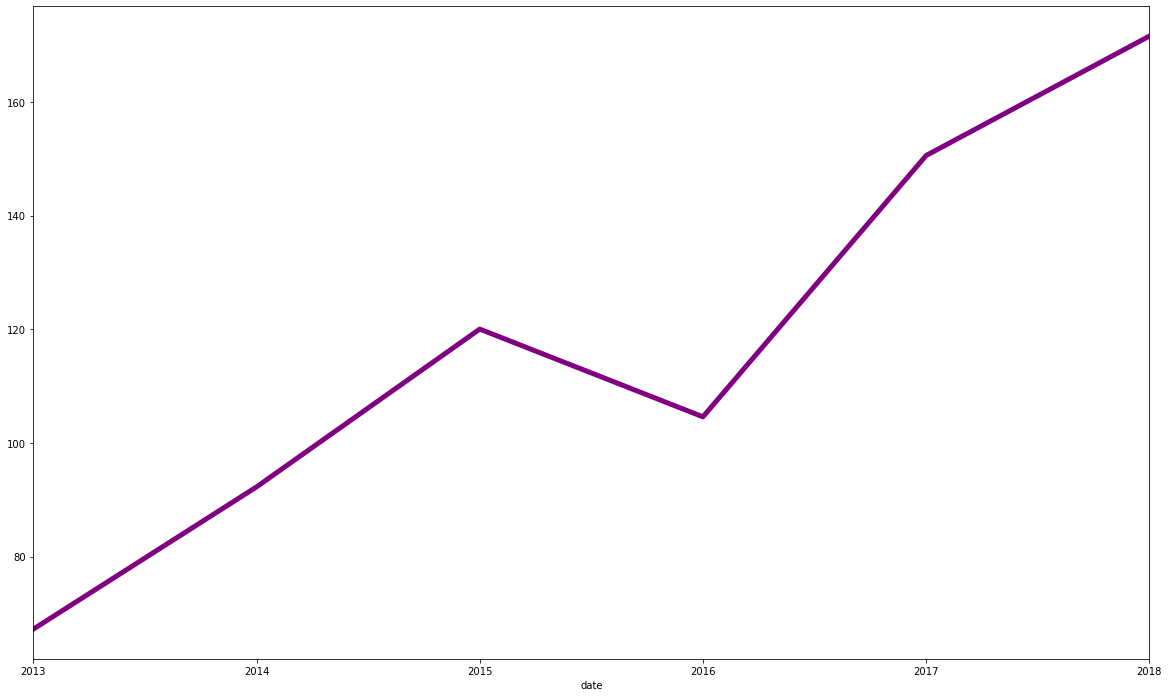

In [19]:
plt.figure(figsize=(20,12))
apple1['close'].resample('Y').mean().plot(color='purple',lw=5);

# Analyze stock price of tech company

In [26]:
apple2=pd.read_csv('AAPL_data.csv')
apple2.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [23]:
google.head()

date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [27]:
amazon.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [28]:
microsoft.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [29]:
close=pd.DataFrame()

In [31]:
close['apple']=apple2['close']
close['google']=google['close']
close['microsoft']=microsoft['close']
close['amazon']=amazon['close']
close.head()

apple    google  microsoft  amazon
0  67.8542  393.0777      27.55  261.95
1  68.5614  391.6012      27.86  257.21
2  66.8428  390.7403      27.88  258.70
3  66.7156  391.8214      28.03  269.47
4  66.6556  394.3039      28.04  269.24

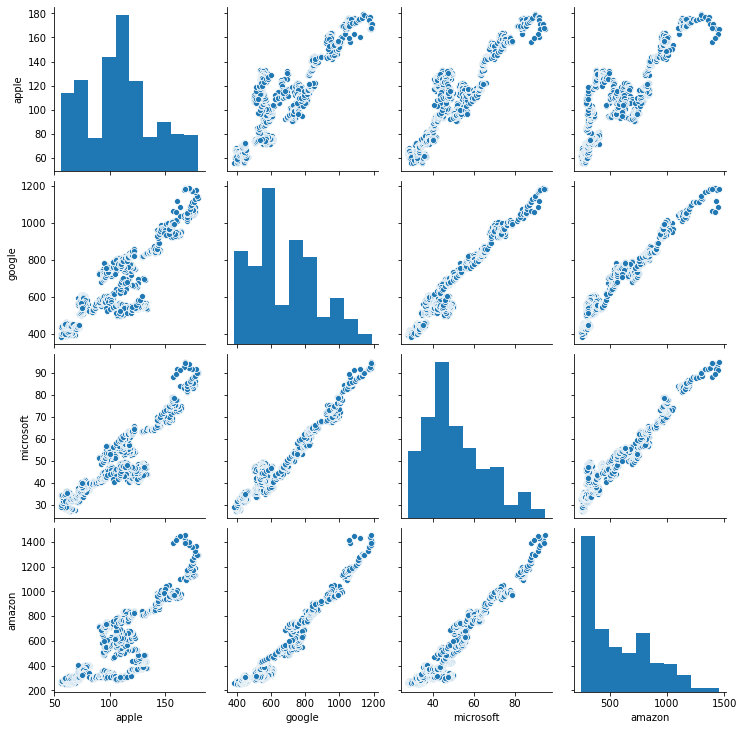

In [33]:
sns.pairplot(close);

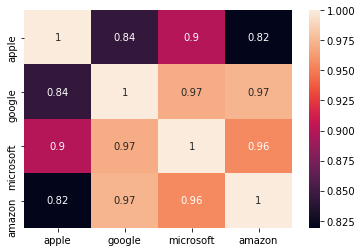

In [35]:
sns.heatmap(close.corr(),annot=True);

# Analyze daily return of each stock of stock and their corr

In [36]:
data=pd.DataFrame()

In [37]:
data['apple_change']=((apple2['close']-apple2['open'])/apple2['close'])
data['google_change']=((google['close']-google['open'])/google['close'])
data['amazon_change']=((amazon['close']-amazon['open'])/amazon['close'])
data['microsoft_change']=((microsoft['close']-microsoft['open'])/microsoft['close'])
data.head()            

apple_change  google_change  amazon_change  microsoft_change
0      0.002063       0.006672       0.002100          0.007260
1      0.007147       0.005138      -0.023288          0.007538
2     -0.024813      -0.001345      -0.001894          0.000000
3     -0.000429       0.003487       0.029465          0.003568
4      0.004436       0.010269       0.006945          0.004280

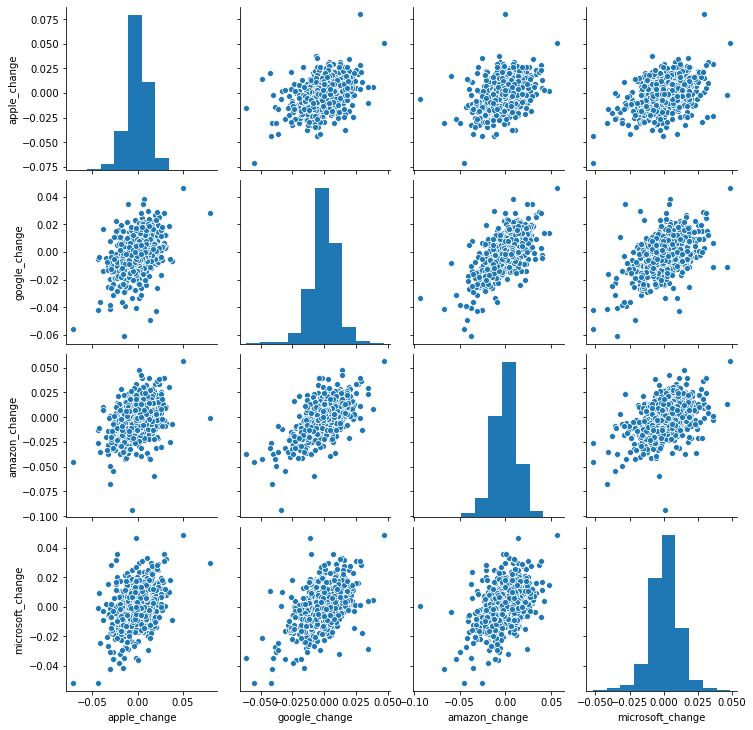

In [39]:
sns.pairplot(data);

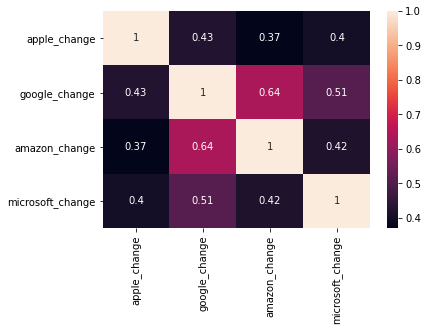

In [41]:
sns.heatmap(data.corr(),annot=True);

# Risk Analysis

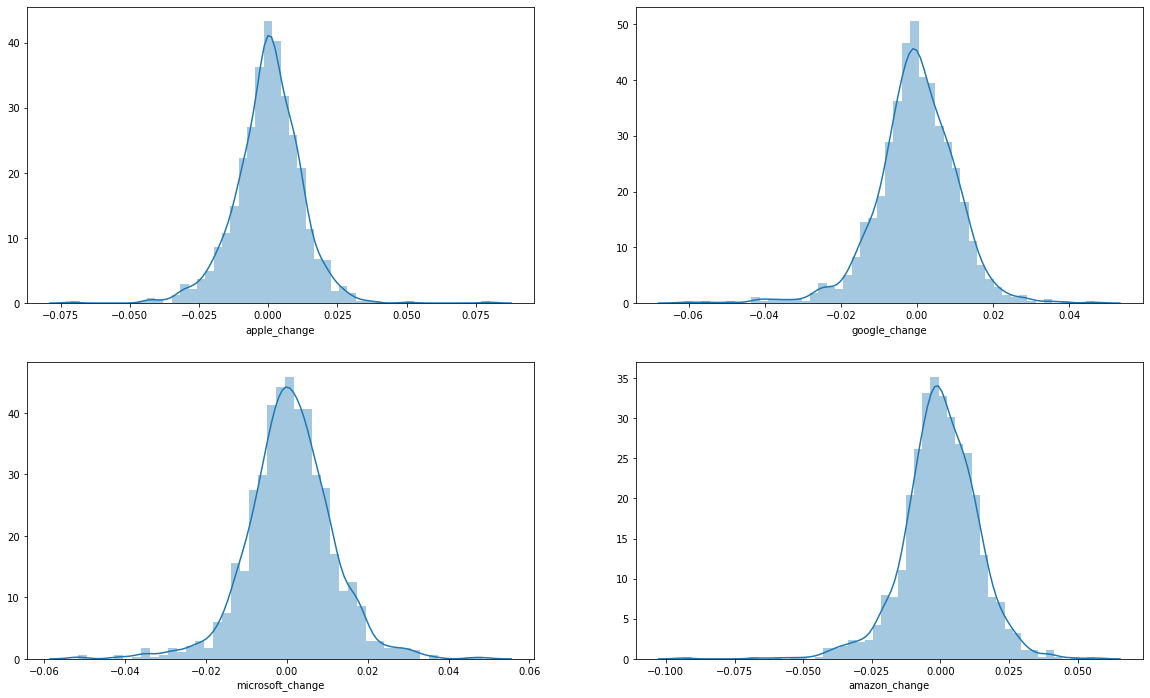

In [54]:
plt.figure(figsize=(20,12))
plt.subplot(2, 2, 1)
sns.distplot(data['apple_change']);
plt.subplot(2, 2, 2)
sns.distplot(data['google_change']);
plt.subplot(2, 2, 3)
sns.distplot(data['microsoft_change']);
plt.subplot(2, 2, 4)
sns.distplot(data['amazon_change']);

In [56]:
data['apple_change'].std()*100
# 68% of data lies between -1.871.. to 1.871...

1.187137713142123

In [58]:
data['apple_change'].std()*2*100
# 95% of data lies between +/- 2.374275426284246

2.374275426284246

In [59]:
data['apple_change'].std()*3*100
# 99% of data lies between +/- 3.561413139426369

3.561413139426369